## Contents
* Linear regression
* Kernel density estimation 


## References
* load 'weight-height.csv' from Kaggle (https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv)  
* install python library (scikit-learn, numpy, matplotlib, scipy)  




### 1. Linear regression


* 선형회귀 (Linear regression) 은 y 와 X 데이터 간의 선형 상관 관계를 이용하여 알려지지 않은 데이터를 예측 
* weight-height 의 관계를 최소제곱법 (Least Squares) 를 이용하여 구현

    * \\( loss = \frac{\sum(w^Tx+b-y)^2}{N}  \\)
    * \\( \nabla loss_w = \frac{\sum(2x)(w^Tx+b-y) }{N} \\)
    * \\( \nabla loss_b = \frac{\sum(2)(w^Tx+b-y) }{N} \\)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt

import csv
import math


In [2]:
X_csv = []; y_csv = []

with open('weight-height.csv', newline='') as csvfile:
    
    csvreader = csv.reader(csvfile, delimiter=',')
    
    next(csvreader)
    for row in csvreader:
        X_csv.append(float(row[1]))
        y_csv.append(float(row[2]))
        
print(len(X_csv))

10000


Text(0, 0.5, 'height')

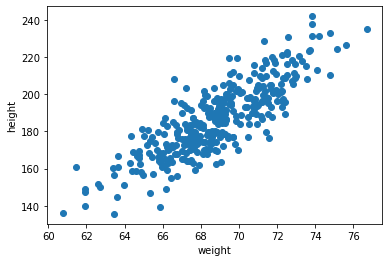

In [3]:
X = np.array(X_csv[:500])
y = np.array(y_csv[:500])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

plt.scatter(X_train, y_train)
plt.xlabel('weight')
plt.ylabel('height')


In [4]:
from sklearn.preprocessing import StandardScaler

class linear_regression:
    
    def __init__(self, x, y, weight, bias, learning_rate, normalization = False):
        self.x = x
        self.y = y
        self.w = weight
        self.b = bias
        self.lr = learning_rate
        self.safe_guard = False
        self.norm = normalization
        
        # normalization
        if self.norm == True:
            self.sc_x = StandardScaler()
            self.sc_y = StandardScaler()
            self.sc_x.fit(x.reshape(-1, 1))
            self.sc_y.fit(x.reshape(-1, 1))
            self.x = self.sc_x.transform(self.x.reshape(-1, 1))
            self.y = self.sc_y.transform(self.y.reshape(-1, 1))
        
        
    def train(self, epochs = 5000, max_gradient_norm = 50):      
        n_data = len(self.x)    

        for i in range(epochs):
            y_hat =  self.w * self.x + self.b
            loss = np.sum((y_hat - self.y) ** 2) / n_data

            gradient_w = np.sum((y_hat - self.y) * (2) * self.x) / n_data
            gradient_b = np.sum((y_hat - self.y) * (2)) / n_data

            # safe guard 
            if self.safe_guard == True:
                concat = np.vstack((gradient_w, gradient_b))
                gradient_norm = np.linalg.norm(concat)

                if max_gradient_norm < gradient_norm: 
                    gradient_w = gradient_w / gradient_norm * max_gradient_norm
                    gradient_b = gradient_b / gradient_norm * max_gradient_norm


            self.w -= (self.lr * gradient_w)
            self.b -= (self.lr * gradient_b)

            if i%(epochs//10) == 0:
                print('Epochs {}/{}, loss {:.3f}, weight {:.3f}, bias {:.3f}'.format(i, epochs, loss, self.w, self.b))

        print('weight: ', self.w)
        print('bias: ', self.b)

        return

    
    def predict(self, x): 
        
        if self.norm == True:
            x = self.sc_x.transform(x.reshape(-1, 1))    
            y = self.w * x + self.b
            y = self.sc_y.inverse_transform(y)
            
        else:
            y = self.w * x + self.b

        return y
    
        

Epochs 0/20000, loss 35267.885, weight 2.580, bias 0.037
Epochs 2000/20000, loss 185.559, weight 2.721, bias -0.096
Epochs 4000/20000, loss 185.467, weight 2.723, bias -0.232
Epochs 6000/20000, loss 185.376, weight 2.725, bias -0.367
Epochs 8000/20000, loss 185.284, weight 2.727, bias -0.502
Epochs 10000/20000, loss 185.193, weight 2.729, bias -0.637
Epochs 12000/20000, loss 185.101, weight 2.731, bias -0.773
Epochs 14000/20000, loss 185.010, weight 2.733, bias -0.908
Epochs 16000/20000, loss 184.919, weight 2.735, bias -1.043
Epochs 18000/20000, loss 184.828, weight 2.737, bias -1.177
weight:  2.739090786850544
bias:  -1.3122076041761679
root mean squared error (train):  13.591801647375231


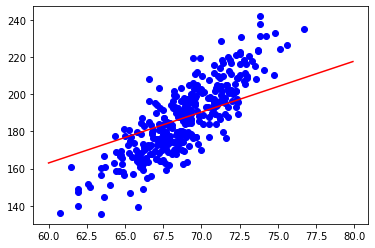

In [5]:
# training 
W = 0.0
b = 0.0
eta = 0.0001

linReg = linear_regression(X_train, y_train, W, b, eta)
linReg.train(epochs=20000)

y_pred = linReg.predict(X_train)
print('root mean squared error (train): ', mean_squared_error(y_train, y_pred)**0.5)

# visualization
X_reg = np.arange(60, 80, 0.1)
y_reg = linReg.predict(X_reg)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_reg, y_reg, color='r')



* X, y data scale 차이에 의해 최적의 weight 와 bias 를 찾지 못함  
    * 문제 해결을 위해 X, y normalization 적용 (아래)

Epochs 0/20000, loss 2013.809, weight 0.001, bias 0.009
Epochs 2000/20000, loss 913.238, weight 1.981, bias 14.612
Epochs 4000/20000, loss 418.759, weight 3.308, bias 24.400
Epochs 6000/20000, loss 196.593, weight 4.198, bias 30.961
Epochs 8000/20000, loss 96.776, weight 4.794, bias 35.358
Epochs 10000/20000, loss 51.928, weight 5.194, bias 38.306
Epochs 12000/20000, loss 31.779, weight 5.462, bias 40.282
Epochs 14000/20000, loss 22.726, weight 5.641, bias 41.606
Epochs 16000/20000, loss 18.658, weight 5.761, bias 42.494
Epochs 18000/20000, loss 16.831, weight 5.842, bias 43.089
weight:  5.8961780613732255
bias:  43.487887995556406
root mean squared error (train):  10.65949758841493


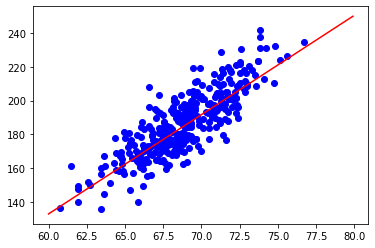

In [6]:
# training 
W = 0.0
b = 0.0
eta = 0.0001

linReg = linear_regression(X_train, y_train, W, b, eta, normalization=True)
linReg.train(epochs=20000)

# prediction
y_pred = linReg.predict(X_train)
print('root mean squared error (train): ', mean_squared_error(y_train, y_pred)**0.5)

# visualization
X_reg = np.arange(60, 80, 0.1)
y_reg = linReg.predict(X_reg)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_reg, y_reg, color='r')



root mean squared error (test):  10.915520420657629


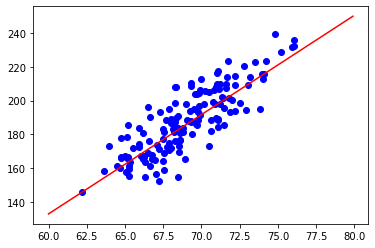

In [7]:
# prediction
y_pred = linReg.predict(X_test)
print('root mean squared error (test): ', mean_squared_error(y_test, y_pred)**0.5)

# visualization
y_reg = linReg.predict(X_reg)

plt.scatter(X_test, y_test, color='b') # real-value
plt.plot(X_reg, y_reg, color='r') # regression



### 2. Kernel density regression  


* Kernel density regession 은 non-parametric 방법으로 확률 변수의 조건부 기대값을 예측하는 방법

    * \\( m_h(x) = \frac{\sum_{i}K_h (x - x_i) y_i}{\sum_j K_h (x - x_j)}   \\)
    * \\( K_h : \\) kernel with a bandwith h


In [8]:
# random dataset

rng = np.random.RandomState(0)

X = 15 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))  # add noise


In [9]:
class Gaussian_Kernel_Regression:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
        
    def gaussian_kernel(self, x):
        return (1 / math.sqrt(2*math.pi))*math.exp(-0.5*x**2)

    def predict(self, x):
        kernels = [ self.gaussian_kernel((xi-x)/self.b) for xi in self.x ]
        y_pred = np.dot([ (kernel/np.sum(kernels)) for kernel in kernels ], self.y)
        return y_pred

    

/home/meisteri/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


Text(0.5, 1.0, 'Kernel density regression')

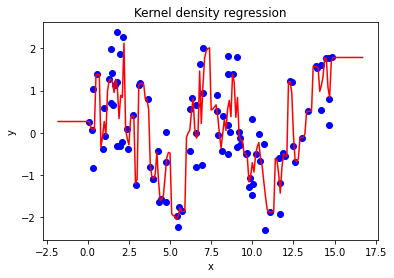

In [10]:
# bandwidth = 0.05
kde2 = Gaussian_Kernel_Regression(X, y, 0.05)
y_pred = [ kde2.predict(x_i) for x_i in X_test ]
X_reg = np.arange(-5, 20, 0.1)
y_reg = [ kde2.predict(x_i) for x_i in X_reg ]

plt.scatter(X, y, color='b')
plt.plot(X_reg, y_reg, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel density regression')


Text(0.5, 1.0, 'Kernel density regression')

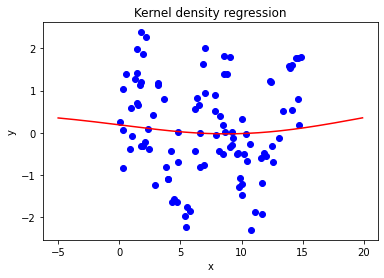

In [11]:
# bandwidth = 5
kde3 = Gaussian_Kernel_Regression(X, y, 5)
y_pred = [ kde3.predict(x_i) for x_i in X_test ]
y_reg = [ kde3.predict(x_i) for x_i in X_reg ]

plt.scatter(X, y, color='b')
plt.plot(X_reg, y_reg, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel density regression')


Text(0.5, 1.0, 'Kernel density regression')

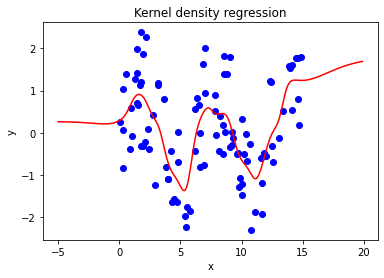

In [12]:
# bandwidth : 0.05, 5.0, 0.5

# bandwidth = 0.5
kde1 = Gaussian_Kernel_Regression(X, y, 0.5)

y_reg = [ kde1.predict(x_i) for x_i in X_reg ]

# visualization
plt.scatter(X, y, color='b')
plt.plot(X_reg, y_reg, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel density regression')
